In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import sklearn

In [4]:
from sklearn.datasets import make_circles

n_samples =1000

x,y = make_circles(n_samples,
                   noise =0.03,
                   random_state =42)

Check input and output shapes


In [5]:
x.shape,y.shape

((1000, 2), (1000,))

In [6]:
x_sample =x[0]
y_sample = y[0]
print(f"Values for x and y {x_sample}{y_sample}")


Values for x and y [0.75424625 0.23148074]1


In [7]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [8]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train, y_test =train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

Building a model

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=4)
    self.layer_2 = nn.Linear(in_features=4,
                             out_features=16)
    self.layer_3 = nn.Linear(in_features =16, out_features =1)
    self.relu = nn.ReLU()
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))));

model = CircleModelV2().to(device)
model


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [11]:
with torch.inference_mode():
  y_preds= model(x_test.to(device))
y_preds

print(f"Length of predictions: {len(y_preds)}, Shape: {y_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{y_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.1897],
        [0.1768],
        [0.1622],
        [0.1982],
        [0.1571],
        [0.1634],
        [0.1599],
        [0.1599],
        [0.1625],
        [0.1759]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


LOSS FUNCTION AND OPTIMISER

In [12]:
loss_fn = nn.BCEWithLogitsLoss()


optimiser = torch.optim.SGD(params = model.parameters(),
                            lr =0.028)

In [13]:
#calculatinng accuracy
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = correct/len(y_pred)*100
  return acc

In [14]:
#Train Model
model.to(device)
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs =10000
for epoch in range(epochs):

  model.train()

  y_logits = model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss= loss_fn(y_logits,y_train) #BCEwith logit loss epects raw logits

  train_acc = accuracy_fn(y_true = y_train,
                         y_pred = y_pred)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc= accuracy_fn(y_test,test_pred)

  if epoch%10 ==0:
    print(f"Epoch {epoch} | loss : {loss:5f} | train_accuracy : {train_acc} |test_accuracy : {test_acc}")

Epoch 0 | loss : 0.697873 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 10 | loss : 0.696672 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 20 | loss : 0.695730 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 30 | loss : 0.694989 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 40 | loss : 0.694402 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 50 | loss : 0.693938 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 60 | loss : 0.693569 | train_accuracy : 50.0 |test_accuracy : 50.0
Epoch 70 | loss : 0.693271 | train_accuracy : 55.50000000000001 |test_accuracy : 56.00000000000001
Epoch 80 | loss : 0.693027 | train_accuracy : 55.25 |test_accuracy : 50.5
Epoch 90 | loss : 0.692824 | train_accuracy : 52.5 |test_accuracy : 47.0
Epoch 100 | loss : 0.692654 | train_accuracy : 52.25 |test_accuracy : 47.5
Epoch 110 | loss : 0.692509 | train_accuracy : 51.625 |test_accuracy : 46.5
Epoch 120 | loss : 0.692384 | train_accuracy : 52.0 |test_accuracy : 45.5
Epoch 130 | loss : 

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary,accuracy_fn


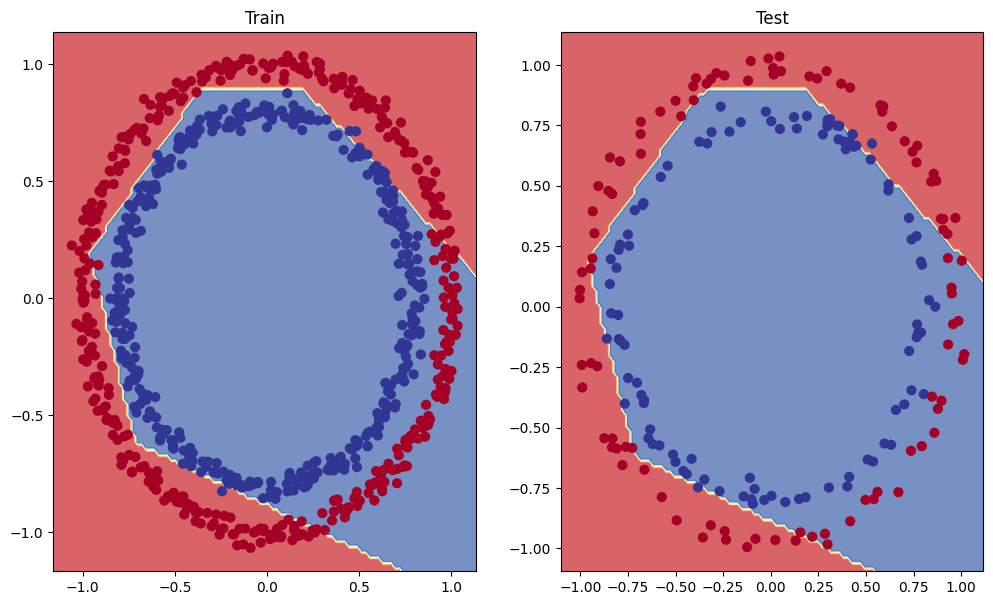

In [16]:
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,x_test,y_test)



In [17]:
next(model.parameters()).device

device(type='cpu')

In [18]:
model.to(device)
model.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model(x_test))).squeeze()

y_preds == y_test

tensor([ True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False,  True,  True,  True, False,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True, 

#MULTICLASS NEURAL NETWORK

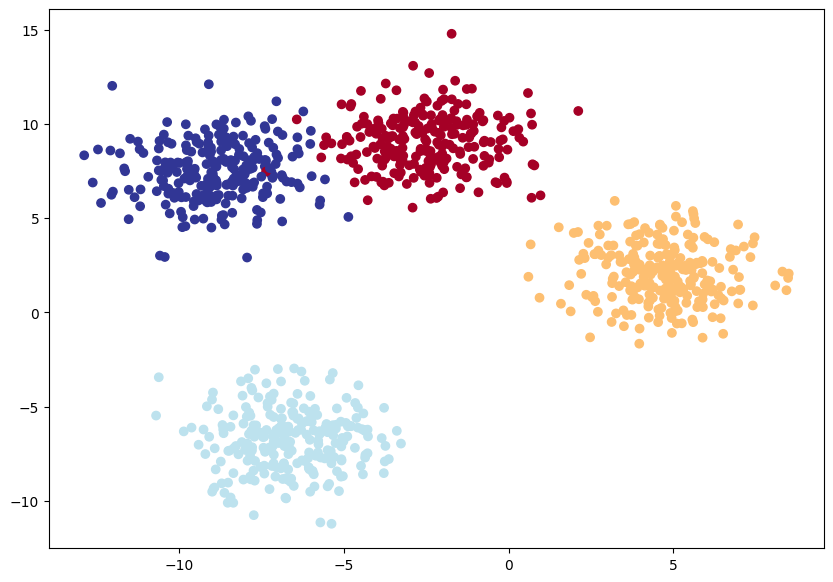

In [19]:
#creating a toy multiclass dataset

import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED = 42

x_blob, y_blob = make_blobs(n_samples =1000,
                            n_features =NUM_FEATURES,
                            centers =NUM_CLASSES,
                            cluster_std =1.5,
                            random_state = RANDOM_SEED)


x_blobs =torch.from_numpy(x_blob).type(torch.float)
y_blobs =torch.from_numpy(y_blob).type(torch.LongTensor)


x_blobs_train,x_blobs_test, y_blobs_train,y_blobs_test =train_test_split(x_blobs,
                                                                      y_blobs,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)

plt.figure(figsize =(10,7))
plt.scatter(x_blobs[:,0], x_blobs[:,1],c=y_blob, cmap =plt.cm.RdYlBu)

MULTICLASS CLASSIFICATION

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [21]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units =8):
    """Initialisess multi-class classification

    Args: input_features(): no. of input for layer
    output_features(): no. of output features
    hidden_units: no. of nodes in layer

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features= input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features = output_features)
    )

  def forward (self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer_stack(x);

model_2 =BlobModel(input_features =NUM_FEATURES,
                  output_features = NUM_CLASSES,
                  hidden_units =8)



LOSS FUNCTION AND OPTIMIZER

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model_2.parameters(),
                            lr =0.1)

In [23]:
model_2.to(device)
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(x_blobs_test.to(device))
y_logits[:10]

tensor([[-7.7002e-02, -1.3300e-01, -3.9054e-01,  3.1784e-02],
        [-3.9873e-01, -7.6311e-01, -6.7333e-01, -4.6382e-02],
        [-5.6105e-01, -2.8425e-01, -3.1212e-01, -2.1267e-01],
        [-1.8745e-02, -6.9724e-03, -3.5512e-01, -8.4436e-04],
        [-3.8615e-01, -3.4652e-01, -7.2653e-01, -2.8040e-01],
        [-4.7305e-01, -9.1007e-01, -7.4595e-01, -6.3093e-02],
        [-3.3524e-01, -4.1979e-02, -5.9031e-01, -1.5776e-01],
        [-3.3360e-01, -4.6667e-01, -6.1343e-01, -1.8502e-01],
        [-8.8492e-01, -5.8366e-01,  5.4925e-02, -3.4286e-01],
        [-3.4623e-01, -4.1517e-01, -6.4816e-01, -2.1358e-01]], device='cuda:0')

In [24]:
y_blobs_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

COnvert Logits to prediction possibilities to various labels

In [25]:
y_pred_probs = torch.softmax(y_logits,dim =1)
print(y_logits[:10])
print(y_pred_probs[:10])

tensor([[-7.7002e-02, -1.3300e-01, -3.9054e-01,  3.1784e-02],
        [-3.9873e-01, -7.6311e-01, -6.7333e-01, -4.6382e-02],
        [-5.6105e-01, -2.8425e-01, -3.1212e-01, -2.1267e-01],
        [-1.8745e-02, -6.9724e-03, -3.5512e-01, -8.4436e-04],
        [-3.8615e-01, -3.4652e-01, -7.2653e-01, -2.8040e-01],
        [-4.7305e-01, -9.1007e-01, -7.4595e-01, -6.3093e-02],
        [-3.3524e-01, -4.1979e-02, -5.9031e-01, -1.5776e-01],
        [-3.3360e-01, -4.6667e-01, -6.1343e-01, -1.8502e-01],
        [-8.8492e-01, -5.8366e-01,  5.4925e-02, -3.4286e-01],
        [-3.4623e-01, -4.1517e-01, -6.4816e-01, -2.1358e-01]], device='cuda:0')
tensor([[0.2638, 0.2494, 0.1928, 0.2941],
        [0.2579, 0.1792, 0.1960, 0.3669],
        [0.1993, 0.2628, 0.2556, 0.2823],
        [0.2671, 0.2702, 0.1908, 0.2719],
        [0.2588, 0.2693, 0.1842, 0.2877],
        [0.2555, 0.1650, 0.1945, 0.3850],
        [0.2320, 0.3111, 0.1798, 0.2771],
        [0.2637, 0.2309, 0.1994, 0.3060],
        [0.1508, 0.2038, 0

In [26]:
torch.sum(y_pred_probs)

tensor(200., device='cuda:0')

In [27]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1,
        3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 2,
        2, 2, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 1, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

CREATE A TRAINING AND TESTING LOOP


In [28]:
epochs =100
model_2.to(device)

x_blobs_train, y_blobs_train = x_blobs_train.to(device), y_blobs_train.to(device)
x_blobs_test, y_blobs_test = x_blobs_test.to(device), y_blobs_test.to(device)


for epoch in range(epochs):

  model_2.train()

  y_logits = model_2(x_blobs_train)
  y_preds = torch.softmax(y_logits,dim =1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blobs_train)

  train_accuracy = accuracy_fn(y_blobs_train,
                              y_preds)


  optimiser.zero_grad()

  loss.backward()

  optimiser.step()


  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(x_blobs_test)
    test_preds = torch.softmax(test_logits,dim =1).argmax(dim =1)

    test_accuracy = accuracy_fn(y_blobs_test,
                              test_preds)

    test_loss = loss_fn(test_logits,y_blobs_test)



  if epoch%10 ==0:
    print(f"Epoch {epoch} | loss : {loss:5f} | train_accuracy : {train_accuracy} |test_accuracy : {test_accuracy}")



Epoch 0 | loss : 1.220016 | train_accuracy : 52.0 |test_accuracy : 66.5
Epoch 10 | loss : 0.610420 | train_accuracy : 86.25 |test_accuracy : 91.5
Epoch 20 | loss : 0.278393 | train_accuracy : 98.875 |test_accuracy : 100.0
Epoch 30 | loss : 0.129992 | train_accuracy : 99.25 |test_accuracy : 99.5
Epoch 40 | loss : 0.082576 | train_accuracy : 99.125 |test_accuracy : 99.5
Epoch 50 | loss : 0.062588 | train_accuracy : 99.125 |test_accuracy : 99.5
Epoch 60 | loss : 0.052010 | train_accuracy : 99.125 |test_accuracy : 99.5
Epoch 70 | loss : 0.045602 | train_accuracy : 99.125 |test_accuracy : 99.5
Epoch 80 | loss : 0.041361 | train_accuracy : 99.125 |test_accuracy : 99.5
Epoch 90 | loss : 0.038375 | train_accuracy : 99.125 |test_accuracy : 99.5


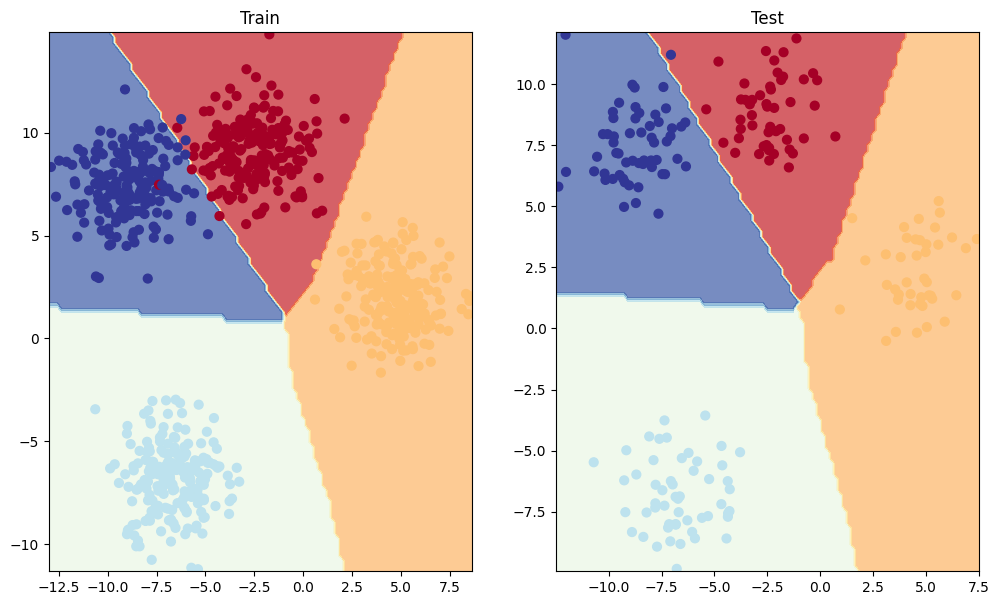

In [29]:
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,x_blobs_train,y_blobs_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,x_blobs_test,y_blobs_test)

In [31]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [33]:
!git commit -m "first commit"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@d1a473653c02.(none)')


In [34]:
!git config --global user.email "shubhamkandpal017@gmail.com"

In [35]:
!git branch -M main

In [43]:
!git remote add origin https://github.com/ShubhamKandpal17/DeepLearning-with-PyTorch

error: remote origin already exists.


In [46]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/ShubhamKandpal17/DeepLearning-with-Torch.git'


In [45]:
!git branch -M main
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/ShubhamKandpal17/DeepLearning-with-Torch.git'
